# Project: E-commerce Sales Analysis

# Load and Prepare the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E_commerce.csv')
df.head()

,OrderID,CustomerID,OrderDate,Category,OrderValue,DiscountApplied,PaymentMethod,Revenue
0,1001,7,2024-01-01,Home & Kitchen,156.59,5,Net Banking,148.76
1,1002,20,2024-01-02,Books,105.24,10,PayPal,94.72
2,1003,15,2024-01-03,Books,107.73,5,Credit Card,102.34
3,1004,11,2024-01-04,Clothing,97.77,0,Net Banking,97.77
4,1005,8,2024-01-05,Home & Kitchen,42.44,20,PayPal,33.95


# Explore the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          100 non-null    int64  
 1   CustomerID       100 non-null    int64  
 2   OrderDate        100 non-null    object 
 3   Category         100 non-null    object 
 4   OrderValue       100 non-null    float64
 5   DiscountApplied  100 non-null    int64  
 6   PaymentMethod    100 non-null    object 
 7   Revenue          100 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.4+ KB


In [4]:
df.describe()

,OrderID,CustomerID,OrderValue,DiscountApplied,Revenue
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1050.500000,10.010000,101.712700,10.750000,91.477000
std,29.011492,5.535003,28.941132,7.295183,29.551128
min,1001.000000,1.000000,42.440000,0.000000,33.950000
25%,1025.750000,5.750000,75.492500,5.000000,70.422500
50%,1050.500000,9.500000,105.220000,10.000000,93.825000
75%,1075.250000,15.000000,119.002500,16.250000,105.837500
max,1100.000000,20.000000,181.610000,20.000000,181.610000


In [5]:
df.isnull().sum()

OrderID            0
CustomerID         0
OrderDate          0
Category           0
OrderValue         0
DiscountApplied    0
PaymentMethod      0
Revenue            0
dtype: int64

In [6]:
# Change the data type.
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.dtypes

OrderID                     int64
CustomerID                  int64
OrderDate          datetime64[ns]
Category                   object
OrderValue                float64
DiscountApplied             int64
PaymentMethod              object
Revenue                   float64
dtype: object

In [8]:
df.duplicated().sum()

0

In [11]:
df.nunique().to_frame("Unique Value")

,Unique Value
OrderID,100
CustomerID,20
OrderDate,100
Category,4
OrderValue,99
DiscountApplied,5
PaymentMethod,3
Revenue,100


In [12]:
df.columns

Index(['OrderID', 'CustomerID', 'OrderDate', 'Category', 'OrderValue',
       'DiscountApplied', 'PaymentMethod', 'Revenue'],
      dtype='object')

# Revenue Over Time

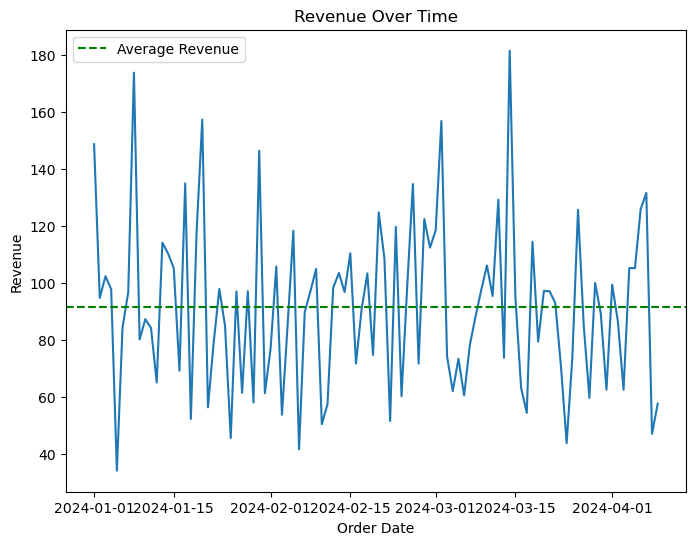

In [13]:
# Create the line plot

plt.figure(figsize=(8,6))
sns.lineplot(x='OrderDate', y='Revenue', data=df,)
plt.title('Revenue Over Time')
plt.xlabel('Order Date')
plt.ylabel('Revenue')

# Adding a horizontal line to represent the average revenue
avg_revenue = df['Revenue'].mean()
plt.axhline(avg_revenue, color='green', linestyle='--', label='Average Revenue')
plt.legend()
plt.show()

# Revenue by Product Category

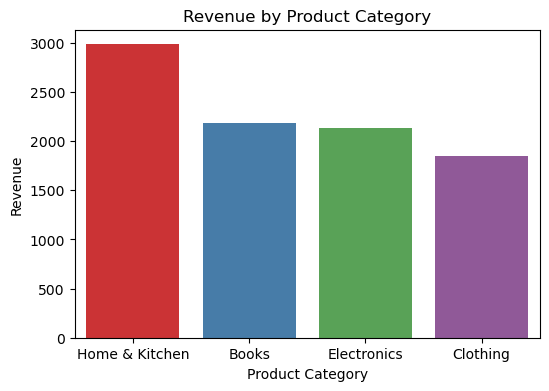

In [15]:
# Revenue by product category in seaborn

plt.figure(figsize=(6,4))
df_sorted = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Category', y='Revenue', data = df_sorted, palette='Set1')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.show()

# Analyze Payment Methods
Check customer preferences

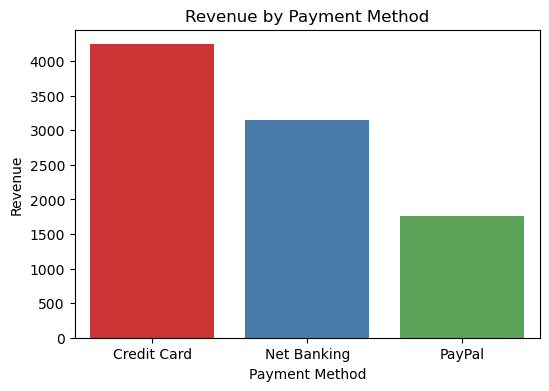

In [16]:
# Analyze payment methods in seaborn

plt.figure(figsize=(6,4))

df_sorted = df.groupby('PaymentMethod')['Revenue'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='PaymentMethod', y='Revenue', data=df_sorted, palette='Set1')
plt.title('Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Revenue')

plt.show()

# Optional Deep-Dive Ideas
Take it a step further by analyzing

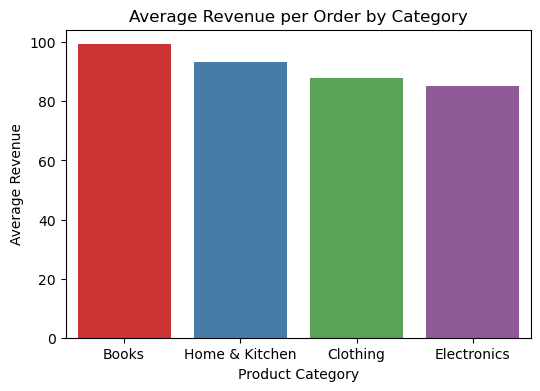

In [18]:
# Average Revenue per order by category in seaborn

plt.figure(figsize=(6,4))
df_sorted = df.groupby('Category')['Revenue'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Category', y='Revenue', data = df_sorted, palette='Set1')
plt.title('Average Revenue per Order by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Revenue')

plt.show()

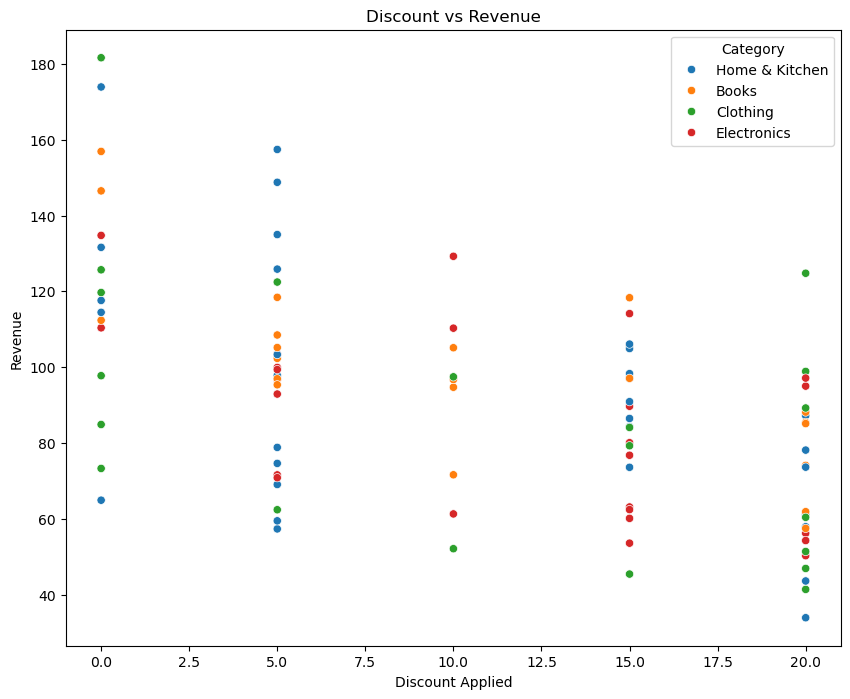

In [23]:
# Discount vs Revenue in seaborn

plt.figure(figsize=(10,8))
sns.scatterplot(x='DiscountApplied', y='Revenue', hue = 'Category', data=df)
plt.title('Discount vs Revenue')
plt.xlabel('Discount Applied')
plt.ylabel('Revenue')

plt.show()

In [21]:
# Most frequent customer in descending order
df.groupby('CustomerID')['OrderID'].count().sort_values(ascending=False)

CustomerID
8     9
7     8
12    8
15    8
4     6
9     6
2     6
1     5
3     5
18    5
14    4
19    4
16    4
11    4
10    4
13    3
17    3
5     3
20    3
6     2
Name: OrderID, dtype: int64

In [22]:
# Average order value by Month
df.groupby('OrderDate')['OrderValue'].mean().sort_values(ascending=False)

OrderDate
2024-03-14    181.61
2024-01-08    173.90
2024-01-20    165.71
2024-03-02    156.90
2024-01-01    156.59
               ...  
2024-01-18     57.94
2024-03-24     54.55
2024-01-25     53.48
2024-02-06     51.78
2024-01-05     42.44
Name: OrderValue, Length: 100, dtype: float64

# Document Your Insights
At the end of the notebook, write a markdown cell summarizing

In [25]:
insights = """
Insights Summary

-    Trends Revenue :
     Monthly revenue shows an increasing trend from January to April.
-    Top Categories: 
     "Home & Kitchen" and "Books" generated the highest revenue.
-     Payment Preferences: 
     "Credit Card" is the most preferred method, followed by "PayPal".
-     Discount Impact: 
      Revenue tends to decrease as discounts increase, indicating a trade-off.
-     Recommendations:
    - Promote high-performing categories with targeted discounts.
    - Encourage frequent customers with loyalty offers.
    - Optimize payment methods based on customer preference.
"""

print(insights)



Insights Summary

-    Trends Revenue :
     Monthly revenue shows an increasing trend from January to April.
-    Top Categories: 
     "Home & Kitchen" and "Books" generated the highest revenue.
-     Payment Preferences: 
     "Credit Card" is the most preferred method, followed by "PayPal".
-     Discount Impact: 
      Revenue tends to decrease as discounts increase, indicating a trade-off.
-     Recommendations:
    - Promote high-performing categories with targeted discounts.
    - Encourage frequent customers with loyalty offers.
    - Optimize payment methods based on customer preference.

